# observations:
01. Temperture and latitude are inversely related. The closer you get to a latitude of 0 the higher the temperture. The farther away you are from a latitude of 0 the lower the temperture.

02. From the data we can see there is no correlation between latitude vs cloudiness, latitude vs wind speed, and latitude vs humidity.

03. In the Northern Hemisphere as the latitude increses the temperture decreses. In the Southern Hemisphere as the latitude increses the temperture increses. 

04. From the linear regression graphs there seems to be no correlation between the Northern and Southern Hemispheres for cloudiness, wind speed, and humidity.


In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#http://api.openweathermap.org/data/2.5weather?&appid=f2c3932996b3b8224c5f910ad4e57614&&units=imperial&q=
# I created an empty list of varibles to add to the url.
city_list = []
city_ID = []
lat = []
lng = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0
set_num = 1
print ("Beginning Data Retrieval")
print ("---------------------------")
#create the for loop
for city in  cities:
    try:
         #pull response varibles from open weather url data, then merged them with the empty list
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        city_ID.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #set count to max 50, starting from 0 add to count else restart count after max count, add set_num after each max
        if count > 49:
            count = 1
            set_num +=1
        else:
            count +=1
        print (f"proceessing Record {count} of set {set_num} {city}")
    except (KeyError):
        print ("City not found. skipping...")
    
    time.sleep(1)
print ("---------------------------")  
print ("End Data Retrieval")

Beginning Data Retrieval
---------------------------
proceessing Record 1 of set 1 ushuaia
proceessing Record 2 of set 1 mataura
proceessing Record 3 of set 1 busselton
proceessing Record 4 of set 1 cape town
proceessing Record 5 of set 1 namatanai
proceessing Record 6 of set 1 port lincoln
proceessing Record 7 of set 1 new norfolk
City not found. skipping...
proceessing Record 8 of set 1 punta arenas
proceessing Record 9 of set 1 kapaa
proceessing Record 10 of set 1 comodoro rivadavia
City not found. skipping...
proceessing Record 11 of set 1 soe
proceessing Record 12 of set 1 rikitea
City not found. skipping...
proceessing Record 13 of set 1 vaini
City not found. skipping...
proceessing Record 14 of set 1 pundaguitan
proceessing Record 15 of set 1 poya
proceessing Record 16 of set 1 carnarvon
proceessing Record 17 of set 1 ilulissat
proceessing Record 18 of set 1 jamestown
proceessing Record 19 of set 1 shepsi
proceessing Record 20 of set 1 bathsheba
proceessing Record 21 of set 1 lo

proceessing Record 38 of set 4 iskateley
proceessing Record 39 of set 4 airai
proceessing Record 40 of set 4 kraluv dvur
proceessing Record 41 of set 4 hithadhoo
proceessing Record 42 of set 4 weligama
proceessing Record 43 of set 4 santa pola
City not found. skipping...
proceessing Record 44 of set 4 navahrudak
proceessing Record 45 of set 4 anadyr
City not found. skipping...
proceessing Record 46 of set 4 charters towers
proceessing Record 47 of set 4 horsham
proceessing Record 48 of set 4 saldanha
proceessing Record 49 of set 4 ribeira brava
proceessing Record 50 of set 4 atherton
proceessing Record 1 of set 5 saint-philippe
City not found. skipping...
proceessing Record 2 of set 5 butembo
proceessing Record 3 of set 5 lubaczow
proceessing Record 4 of set 5 heinola
proceessing Record 5 of set 5 candido mendes
proceessing Record 6 of set 5 vao
proceessing Record 7 of set 5 asau
proceessing Record 8 of set 5 victoria
proceessing Record 9 of set 5 pochutla
proceessing Record 10 of set 

proceessing Record 32 of set 8 skjervoy
proceessing Record 33 of set 8 okha
proceessing Record 34 of set 8 chengde
proceessing Record 35 of set 8 sabang
proceessing Record 36 of set 8 sibolga
proceessing Record 37 of set 8 baie-comeau
proceessing Record 38 of set 8 bilma
proceessing Record 39 of set 8 santa cruz
proceessing Record 40 of set 8 rocha
proceessing Record 41 of set 8 karratha
proceessing Record 42 of set 8 san andres
proceessing Record 43 of set 8 praia da vitoria
proceessing Record 44 of set 8 kirakira
proceessing Record 45 of set 8 athabasca
proceessing Record 46 of set 8 naze
City not found. skipping...
proceessing Record 47 of set 8 aljezur
proceessing Record 48 of set 8 fairbanks
proceessing Record 49 of set 8 plouzane
proceessing Record 50 of set 8 kahna nau
proceessing Record 1 of set 9 west bay
proceessing Record 2 of set 9 torbay
City not found. skipping...
proceessing Record 3 of set 9 klaksvik
proceessing Record 4 of set 9 port-gentil
proceessing Record 5 of set 

In [31]:
print (query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f2c3932996b3b8224c5f910ad4e57614&units=imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
#Creating a dataframe setting the columns to fill the empty list above
city_data = pd.DataFrame({"City": city_list, "Lat": lat, "Lng": lng, "Max Temp": temperature, "Humidity": humidity, 
                          "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})

city_data 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,36.81,89,100,6.58,AR,1627416209
1,Mataura,-46.1927,168.8643,48.47,97,25,1.25,NZ,1627416293
2,Busselton,-33.6500,115.3333,46.04,64,100,12.33,AU,1627415844
3,Cape Town,-33.9258,18.4232,56.08,85,94,4.00,ZA,1627416295
4,Namatanai,-3.6667,152.4333,78.94,82,53,4.70,PG,1627416080
...,...,...,...,...,...,...,...,...,...
525,Puerto Limón,10.0000,-83.0333,82.72,73,48,5.30,CR,1627417019
526,Cukai,4.2500,103.4167,80.55,89,67,3.62,MY,1627417020
527,Rio Grande,-32.0350,-52.0986,50.11,50,6,20.24,BR,1627417021
528,Jesup,31.6074,-81.8854,93.13,52,75,0.00,US,1627416785


In [8]:
city_data.to_csv("cities.csv")


In [9]:
#change columns to numeric numbers to calculate data
city_data["Max Temp"]=pd.to_numeric(city_data["Max Temp"])
city_data["Humidity"]=pd.to_numeric(city_data["Humidity"])
city_data["Cloudiness"]=pd.to_numeric(city_data["Cloudiness"])
city_data["Wind Speed"]=pd.to_numeric(city_data["Wind Speed"])
city_data["Date"]=pd.to_numeric(city_data["Date"])

# describe method is for calculating statistical data bring the above data together
df = city_data.describe()
df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,19.447621,18.191154,69.354132,71.239623,52.996226,8.134057,1.627417e+09
std,33.995350,89.653742,14.593244,20.806452,40.056765,5.555730,2.687634e+02
min,-54.800000,-179.166700,33.910000,14.000000,0.000000,0.000000,1.627416e+09
25%,-10.576125,-58.509375,58.665000,59.000000,9.000000,3.875000,1.627416e+09
50%,21.608350,20.832850,70.665000,76.000000,53.500000,7.205000,1.627417e+09
75%,49.834025,95.174375,80.780000,87.000000,97.000000,11.130000,1.627417e+09
max,78.218600,179.316700,102.650000,100.000000,100.000000,42.430000,1.627417e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


no cities that have humidity > 100%

In [10]:
#looking for cities with humidity over 100
Reduce_city_data = city_data[(city_data["Humidity"]>100)]
Reduce_city_data.index

Int64Index([], dtype='int64')

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

#no cities with humidity > 100

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [11]:
#no cities with humidity over 100 therefor there were no outliers
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,36.81,89,100,6.58,AR,1627416209
1,Mataura,-46.1927,168.8643,48.47,97,25,1.25,NZ,1627416293
2,Busselton,-33.6500,115.3333,46.04,64,100,12.33,AU,1627415844
3,Cape Town,-33.9258,18.4232,56.08,85,94,4.00,ZA,1627416295
4,Namatanai,-3.6667,152.4333,78.94,82,53,4.70,PG,1627416080
...,...,...,...,...,...,...,...,...,...
525,Puerto Limón,10.0000,-83.0333,82.72,73,48,5.30,CR,1627417019
526,Cukai,4.2500,103.4167,80.55,89,67,3.62,MY,1627417020
527,Rio Grande,-32.0350,-52.0986,50.11,50,6,20.24,BR,1627417021
528,Jesup,31.6074,-81.8854,93.13,52,75,0.00,US,1627416785


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

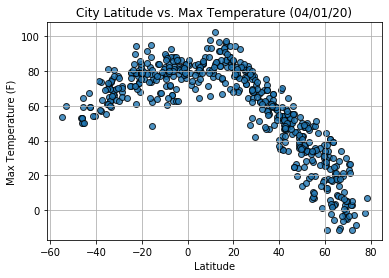

07/27/21


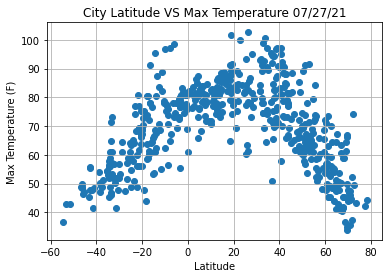

In [37]:
#time.strftime(format[, t])
#%D - same as %m/%d/%y
#create code for todays date
today = time.strftime("%m/%d/%y")
x_axis = city_data["Lat"]
y_axis = city_data["Max Temp"]
plt.scatter(x_axis, y_axis)

print (today)
plt.title(f"City Latitude VS Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/city lat vs temp.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's 
latitude and max temperature on the date shown. The highest temperatures are between a latitude range
of 20 to 40 degrees. The farther away the city is from this range temperature decreases.

## Latitude vs. Humidity Plot

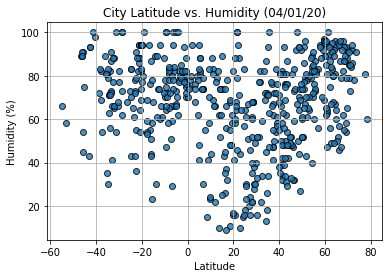

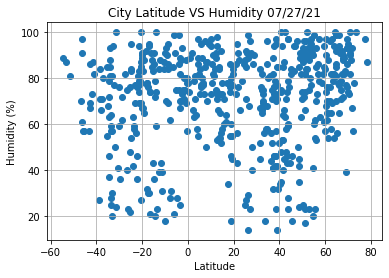

In [36]:
x_axis = city_data["Lat"]
y_axis = city_data["Humidity"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/city lat vs Humidity")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs humidity.
There seems to be no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

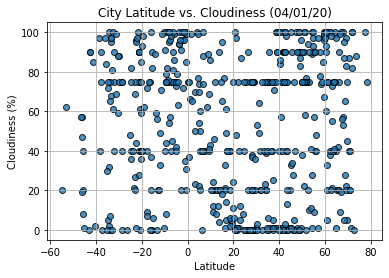

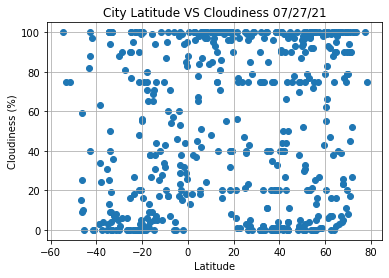

In [35]:
x_axis = city_data["Lat"]
y_axis = city_data["Cloudiness"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/city lat vs cloudiness.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs Cloudiness.
There seems to be no correlation between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

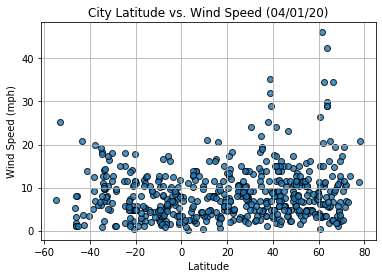

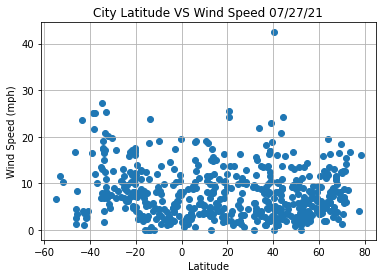

In [34]:
x_axis = city_data["Lat"]
y_axis = city_data["Wind Speed"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/city lat vs Wind Speed.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs Wind Speed.
Regardless of latitude most city"s Wind Speed is below 10 (mph).

## Linear Regression

In [16]:
North = city_data.loc[city_data["Lat"]>0]
South  = city_data.loc[city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


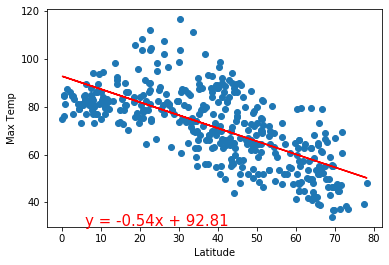

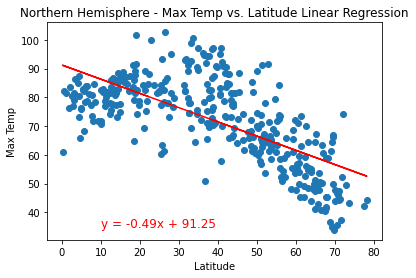

the r-value is: 0.47191460168550076


In [33]:
x_axis = North["Lat"]
y_axis = North["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=12,color="red")


plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/Northern Hem Regrss.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The r-value is: 0.6082708688906918


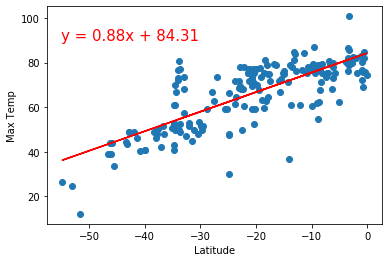

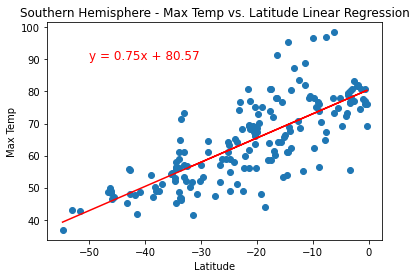

the r-value is: 0.5744759322631491


In [32]:
x_axis = South["Lat"]
y_axis = South["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=12,color="red")


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/Southern Hem Regrss.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and temperature within the Northern and Southern Hemispheres.
The farther you are away from 0 degrees the more the temperature drops.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


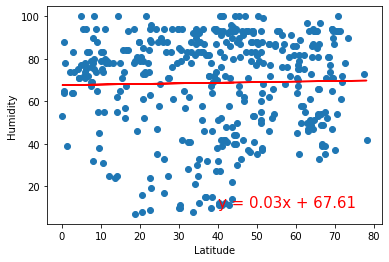

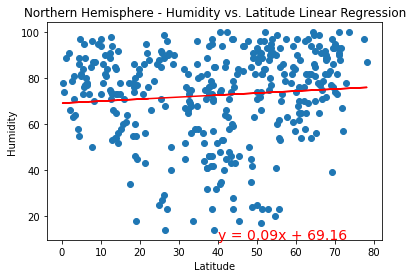

the r-value is: 0.00798642159841593


In [31]:
x_axis = North["Lat"]
y_axis = North["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=14,color="red")


plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/Northern Hem Humidity.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


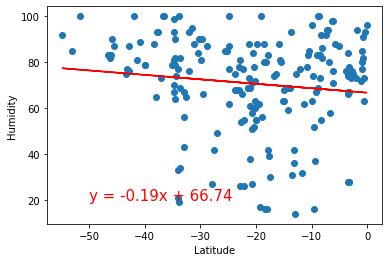

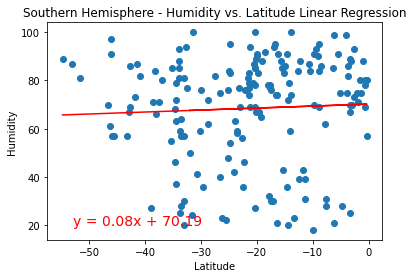

the r-value is: 0.0023497746697504567


In [30]:
x_axis = South["Lat"]
y_axis = South["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,20),fontsize=14,color="red")


plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/Southern Hem Humidity.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and humidity within the Northern and Southern Hemispheres.
There is no correlation between latitude and humidity. The humidity on both hemispheres for most cities seem to be 
around 70%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


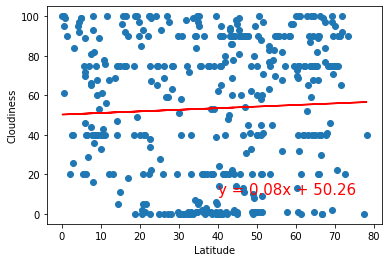

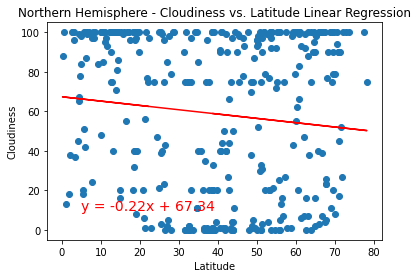

the r-value is: 0.012557980987787293


In [29]:
x_axis = North["Lat"]
y_axis = North["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")


plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Northern Hem Cloudiness.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


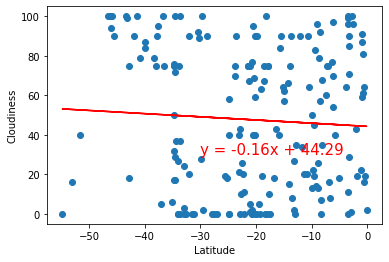

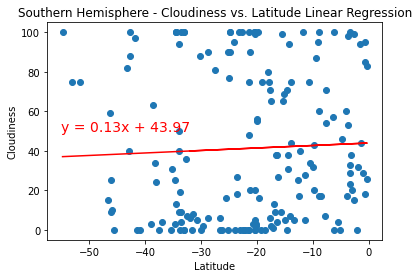

the r-value is: 0.0018937647813997438


In [28]:
x_axis = South["Lat"]
y_axis = South["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=14,color="red")


plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Southern Hem Cloudiness.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and cloudiness within the Northern and Southern Hemispheres.
There is no correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


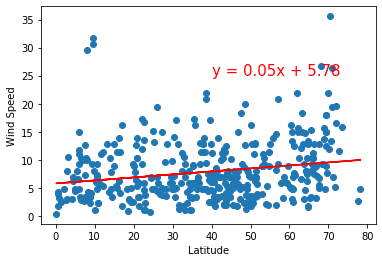

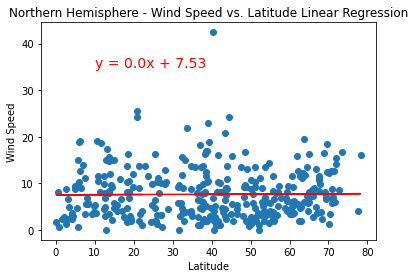

the r-value is: 0.00014844539613547347


In [27]:
x_axis = North["Lat"]
y_axis = North["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=14,color="red")


plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/Northern Hem Wind Speed.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


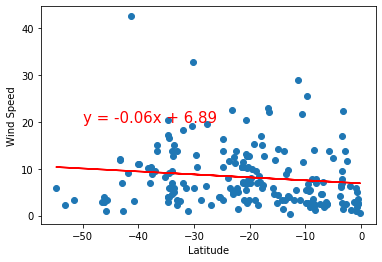

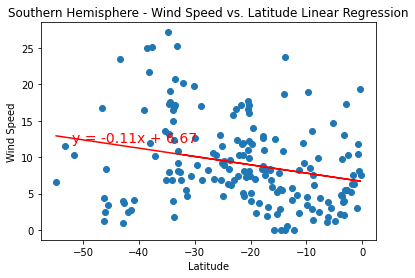

the r-value is: 0.0631843649040986


In [26]:
x_axis = South["Lat"]
y_axis = South["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-52,12),fontsize=14,color="red")


plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/Southern Hem Wind Speed.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and wind speed within the Northern and Southern Hemispheres.
There is no correlation between latitude and wind speed. The wind speed on the northern hemisphere for most cities seem to be 
below 15 mph. The wind speed for most cities in the southern hemisphere is below 10 mph.